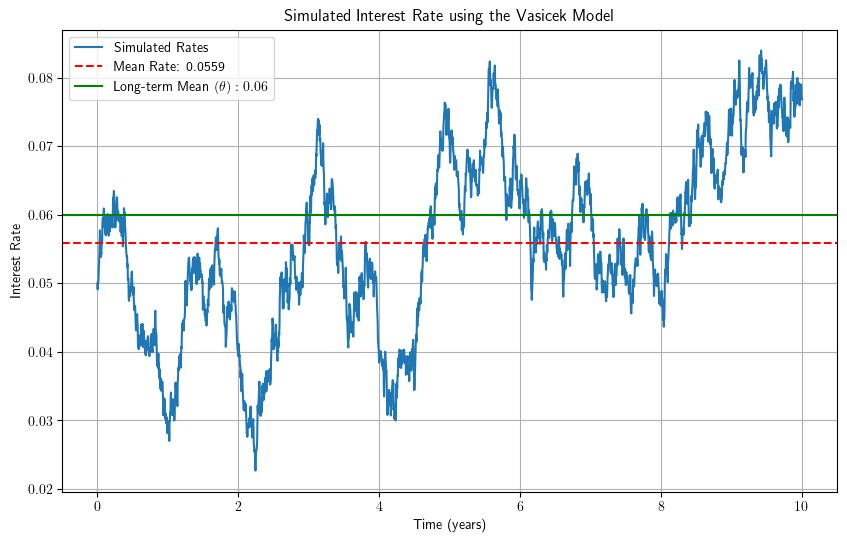

In [70]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
np.random.seed(13)

def simulate_vasicek(r0, a, b, sigma, T, dt):
    """
    Simulate interest rate using the Vasicek model.
    
    Parameters:
        r0 (float): Initial interest rate
        a (float): Speed of mean reversion
        b (float): Long-term mean interest rate
        sigma (float): Volatility of interest rate
        T (int): Time horizon for the simulation
        dt (float): Time step size

    Returns:
        np.array: Simulated interest rates over time
    """
    N = int(T / dt)
    t = np.linspace(0, T, N)
    rates = np.zeros(N)
    rates[0] = r0

    for i in range(1, N):
        dw = np.random.normal(0, np.sqrt(dt))
        rates[i] = rates[i-1] + a * (b - rates[i-1]) * dt + sigma * dw

    return t, rates

# Parameters for the Vasicek model
r0 = 0.05  # Initial interest rate
a = 0.5    # Speed of mean reversion
b = 0.06   # Long-term mean rate
sigma = 0.02  # Volatility
T = 10     # Total time in years
dt = 1/252  # Time step in years

# Simulate the Vasicek model
t, rates = simulate_vasicek(r0, a, b, sigma, T, dt)


# Calculate the mean of the simulated rates
mean_rates = np.mean(rates)

# Plotting the results with the mean rate line



# Save the plot to a file
plt.figure(figsize=(10, 6))
plt.plot(t, rates, label="Simulated Rates")
plt.axhline(y=mean_rates, color='r', linestyle='--', label=f"Mean Rate: {mean_rates:.4f}")
plt.axhline(y=b, color='g', linestyle='-', label=f"Long-term Mean $(\\theta ): {b:.2f}$")
plt.title("Simulated Interest Rate using the Vasicek Model")
plt.xlabel("Time (years)")
plt.ylabel("Interest Rate")
plt.legend()
plt.grid(True)

plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlot.pdf")

# Additionally, save as PNG for web/other uses if needed
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlot.png")
plt.show()
plt.close()